In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
import os

In [77]:
os.listdir(r"C:\Users\DELL\OneDrive - Purdue University Fort Wayne\Desktop\Data Analysis Projects\Uber\Datasets")


['other-American_B01362.csv',
 'other-Carmel_B00256.csv',
 'other-Dial7_B00887.csv',
 'other-Diplo_B01196.csv',
 'other-Federal_02216.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Highclass_B01717.csv',
 'other-Lyft_B02510.csv',
 'other-Prestige_B01338.csv',
 'other-Skyline_B00111.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [78]:
uber_15 = pd.read_csv(r"C:\Users\DELL\OneDrive - Purdue University Fort Wayne\Desktop\Data Analysis Projects\Uber\Datasets\uber-raw-data-janjune-15_sample.csv")


In [79]:
uber_15.shape

(100000, 4)

In [80]:
type(uber_15)

pandas.core.frame.DataFrame

In [81]:
uber_15.duplicated().sum()

np.int64(54)

In [82]:
uber_15.drop_duplicates(inplace=True)

In [83]:
uber_15.duplicated().sum()

np.int64(0)

In [84]:
uber_15.shape

(99946, 4)

In [85]:
uber_15.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [86]:
uber_15.isnull().sum()

Dispatching_base_num       0
Pickup_date                0
Affiliated_base_num     1116
locationID                 0
dtype: int64

In [87]:
uber_15['Pickup_date'][0]

'2015-05-02 21:43:00'

In [88]:
type(uber_15['Pickup_date'][0])

str

In [89]:
uber_15['Pickup_date']=pd.to_datetime(uber_15['Pickup_date'])

In [90]:
uber_15['Pickup_date'].dtype

dtype('<M8[ns]')

In [91]:
uber_15['Pickup_date'][0]

Timestamp('2015-05-02 21:43:00')

In [92]:
type(uber_15['Pickup_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [93]:
uber_15.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                       int64
dtype: object

In [94]:
uber_15['month'] = uber_15['Pickup_date'].dt.month_name()

In [95]:
uber_15['month']

0            May
1        January
2          March
3          April
4          March
          ...   
99995      April
99996      March
99997      March
99998        May
99999       June
Name: month, Length: 99946, dtype: object

<Axes: xlabel='month'>

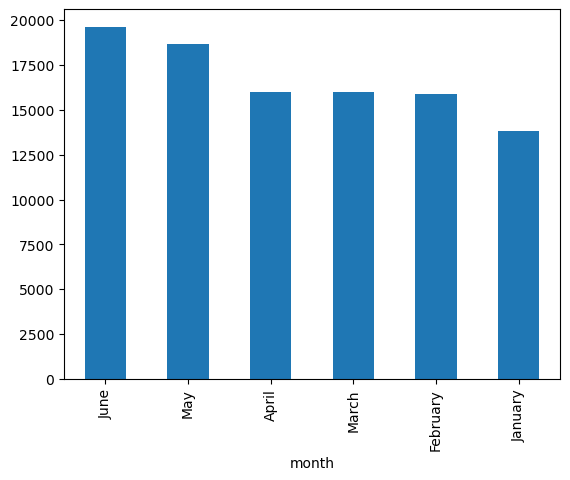

In [96]:
uber_15['month'].value_counts().plot(kind='bar')

In [97]:
uber_15['Weekday']=uber_15['Pickup_date'].dt.day_name()
uber_15['Day']=uber_15['Pickup_date'].dt.day
uber_15['Hour']=uber_15['Pickup_date'].dt.hour
uber_15['Minute']=uber_15['Pickup_date'].dt.minute


In [98]:
uber_15.head(4)

Dispatching_base_num         Pickup_date Affiliated_base_num  locationID  \
0               B02617 2015-05-02 21:43:00              B02764         237   
1               B02682 2015-01-20 19:52:59              B02682         231   
2               B02617 2015-03-19 20:26:00              B02617         161   
3               B02764 2015-04-10 17:38:00              B02764         107   

     month   Weekday  Day  Hour  Minute  
0      May  Saturday    2    21      43  
1  January   Tuesday   20    19      52  
2    March  Thursday   19    20      26  
3    April    Friday   10    17      38

In [99]:
pivot = pd.crosstab(index=uber_15['month'],columns=uber_15['Weekday'])

In [100]:
pivot

Weekday   Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
month                                                                   
April       2365    1833      2508    2052      2823     1880       2521
February    2655    1970      2550    2183      2396     2129       2013
January     2508    1353      2745    1651      2378     1444       1740
June        2793    2848      3037    2485      2767     3187       2503
March       2465    2115      2522    2379      2093     2388       2007
May         3262    1865      3519    2944      2627     2115       2328

<Axes: xlabel='month'>

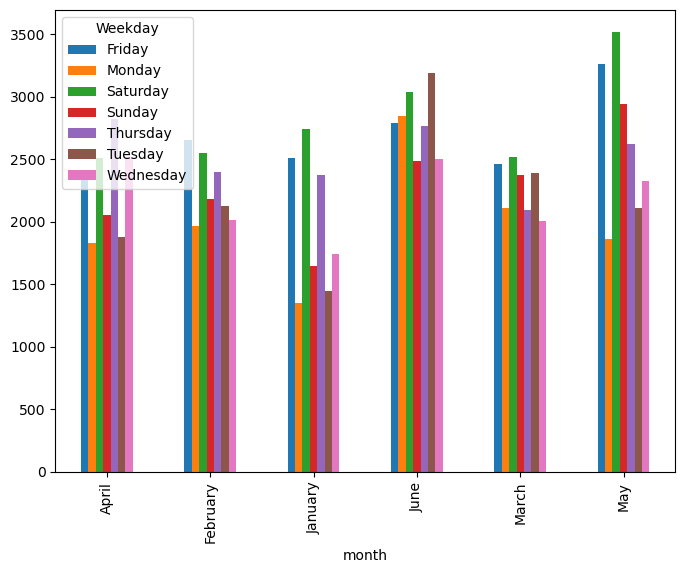

In [101]:
pivot.plot(kind='bar',figsize=(8,6))

In [52]:
summary=uber_15.groupby(['Weekday','Hour'],as_index=False).size()

In [102]:
summary

Weekday  Hour  size
0       Friday     0   581
1       Friday     1   333
2       Friday     2   197
3       Friday     3   138
4       Friday     4   161
..         ...   ...   ...
163  Wednesday    19  1044
164  Wednesday    20   897
165  Wednesday    21   949
166  Wednesday    22   900
167  Wednesday    23   669

[168 rows x 3 columns]

<Axes: xlabel='Hour', ylabel='size'>

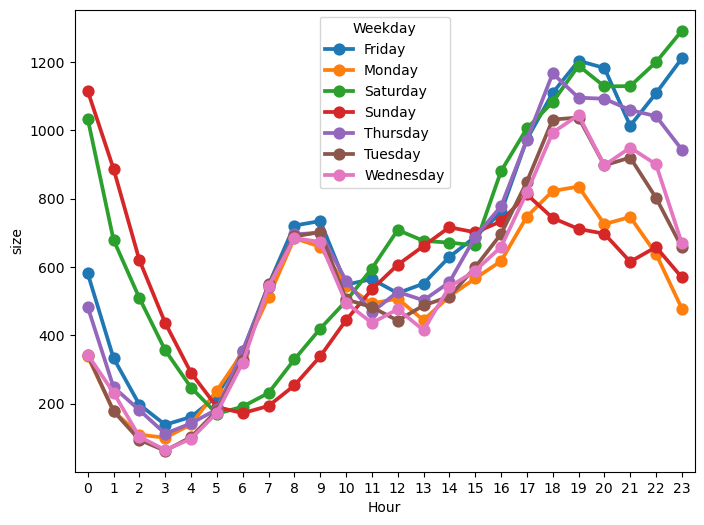

In [103]:
plt.figure(figsize=(8,6))
sns.pointplot(x="Hour",y="size", hue="Weekday", data=summary)


In [104]:
uber_15.columns

Index(['Dispatching_base_num', 'Pickup_date', 'Affiliated_base_num',
       'locationID', 'month', 'Weekday', 'Day', 'Hour', 'Minute'],
      dtype='object')

In [105]:
os.listdir(r"C:\Users\DELL\OneDrive - Purdue University Fort Wayne\Desktop\Data Analysis Projects\Uber\Datasets")

['other-American_B01362.csv',
 'other-Carmel_B00256.csv',
 'other-Dial7_B00887.csv',
 'other-Diplo_B01196.csv',
 'other-Federal_02216.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Highclass_B01717.csv',
 'other-Lyft_B02510.csv',
 'other-Prestige_B01338.csv',
 'other-Skyline_B00111.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [106]:
uber_foil=pd.read_csv(r"C:\Users\DELL\OneDrive - Purdue University Fort Wayne\Desktop\Data Analysis Projects\Uber\Datasets/Uber-Jan-Feb-FOIL.csv")

In [107]:
uber_foil.shape

(354, 4)

In [108]:
uber_foil.head(3)

dispatching_base_number      date  active_vehicles  trips
0                  B02512  1/1/2015              190   1132
1                  B02765  1/1/2015              225   1765
2                  B02764  1/1/2015             3427  29421

In [109]:
!pip install chart_studio
!pip install plotly

In [110]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [111]:
init_notebook_mode(connected=True)

In [112]:
uber_foil.columns

Index(['dispatching_base_number', 'date', 'active_vehicles', 'trips'], dtype='object')

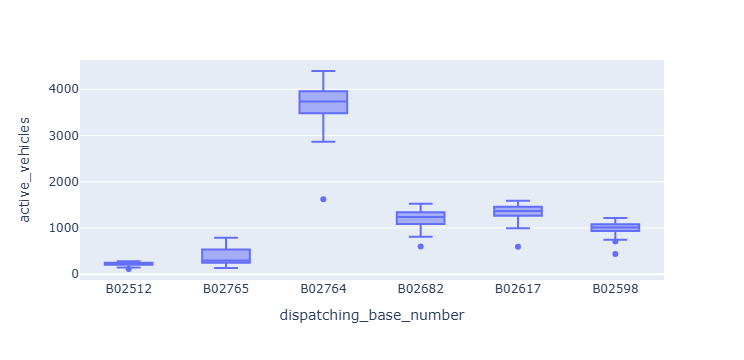

In [113]:
px.box(x='dispatching_base_number',y='active_vehicles',data_frame=uber_foil)

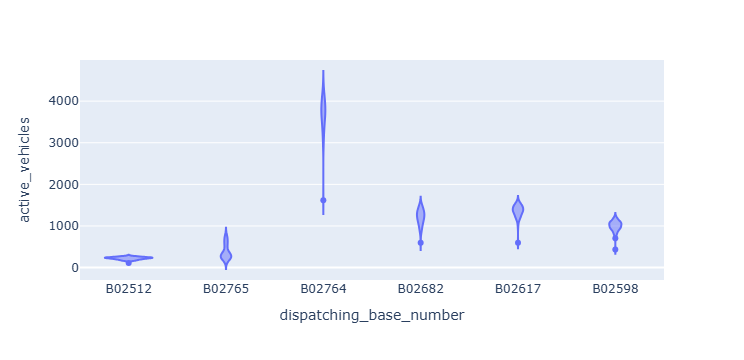

In [74]:
px.violin(x='dispatching_base_number',y='active_vehicles',data_frame=uber_foil)

In [129]:
files = os.listdir(r"C:\Users\DELL\OneDrive - Purdue University Fort Wayne\Desktop\Data Analysis Projects\Uber\Datasets")[-8:]
files
files.remove( 'uber-raw-data-janjune-15.csv')


files.remove('uber-raw-data-janjune-15_sample.csv')

In [130]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [131]:
files.remove( 'uber-raw-data-janjune-15_sample.csv')

In [132]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [136]:
final = pd.DataFrame()

path = r"C:\Users\DELL\OneDrive - Purdue University Fort Wayne\Desktop\Data Analysis Projects\Uber\Datasets"
for file in files:
  current_df = pd.read_csv(path+'/'+file)
final= pd.concat([current_df,final])

In [137]:
final.shape

(1028136, 4)

In [138]:
final.duplicated().sum()

np.int64(24037)

In [139]:
final.drop_duplicates(inplace=True)

In [140]:
final.shape

(1004099, 4)

In [141]:
final.head(3)

Date/Time      Lat      Lon    Base
0  9/1/2014 0:01:00  40.2201 -74.0021  B02512
1  9/1/2014 0:01:00  40.7500 -74.0027  B02512
2  9/1/2014 0:03:00  40.7559 -73.9864  B02512

In [142]:
rush_uber=final.groupby(['Lat','Lon'],as_index=False).size()

In [143]:
rush_uber.head(6)

Lat      Lon  size
0  39.9897 -74.1423     1
1  40.0580 -74.0847     1
2  40.0794 -74.0456     1
3  40.0972 -74.0877     1
4  40.1122 -74.0480     1
5  40.1212 -74.0614     1

In [145]:
!pip install folium


   -------------------- ------------------- 1/2 [folium]
   ---------------------------------------- 2/2 [folium]



In [153]:
import folium

In [157]:
basemap = folium.Map()

In [158]:
basemap

In [159]:
from folium.plugins import HeatMap

In [160]:
HeatMap(rush_uber).add_to(basemap)

In [161]:
basemap

In [162]:
final.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')

In [163]:
final.head(3)

Date/Time      Lat      Lon    Base
0  9/1/2014 0:01:00  40.2201 -74.0021  B02512
1  9/1/2014 0:01:00  40.7500 -74.0027  B02512
2  9/1/2014 0:03:00  40.7559 -73.9864  B02512

In [164]:
final.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [166]:
final['Date/Time'][0]

'9/1/2014 0:01:00'

In [169]:
final['Date/Time']=pd.to_datetime(final['Date/Time'], format="%m/%d/%Y %H:%M:%S")

In [170]:
final['Date/Time'].dtype

dtype('<M8[ns]')

In [173]:
final['day']=final['Date/Time'].dt.day
final['hour']=final['Date/Time'].dt.hour

In [174]:
final.head(4)

Date/Time      Lat      Lon    Base  day  hour
0 2014-09-01 00:01:00  40.2201 -74.0021  B02512    1     0
1 2014-09-01 00:01:00  40.7500 -74.0027  B02512    1     0
2 2014-09-01 00:03:00  40.7559 -73.9864  B02512    1     0
3 2014-09-01 00:06:00  40.7450 -73.9889  B02512    1     0

In [184]:
pivot =final.groupby(['day','hour'],).size().unstack()

In [185]:
pivot

hour      0       1       2      3      4      5       6       7       8   \
day                                                                         
1      682.0   480.0   356.0  329.0  260.0  278.0   327.0   416.0   551.0   
2      204.0   108.0    81.0  288.0  511.0  843.0  1241.0  1565.0  1689.0   
3      278.0   150.0   113.0  200.0  351.0  744.0  1359.0  1633.0  1640.0   
4      484.0   263.0   177.0  244.0  374.0  744.0  1336.0  1707.0  1770.0   
5      634.0   359.0   229.0  298.0  456.0  806.0  1302.0  1677.0  1824.0   
6     1664.0  1092.0   690.0  466.0  340.0  337.0   516.0   696.0   942.0   
7     1794.0  1219.0   805.0  556.0  328.0  352.0   382.0   555.0   801.0   
8      321.0   199.0   155.0  365.0  508.0  897.0  1194.0  1646.0  1692.0   
9      305.0   192.0   145.0  239.0  398.0  807.0  1410.0  1745.0  1751.0   
10     421.0   304.0   177.0  233.0  392.0  775.0  1314.0  1635.0  1734.0   
11     472.0   289.0   182.0  274.0  440.0  317.0  1015.0  1518.0  1698.0   
12     590.0   382.0   257.0  324.0  469.0  797.0  1245.0  1622.0  1698.0   
13    1772.0  1184.0   764.0  517.0  360.0  400.0   479.0   648.0   912.0   
14    1772.0  1233.0   855.0  540.0  360.0  379.0   405.0   547.0   748.0   
15     251.0   167.0   151.0  335.0  554.0  861.0  1328.0  1656.0  1666.0   
16     264.0   134.0   123.0  212.0  367.0  774.0  1627.0  2254.0  2458.0   
17     360.0   200.0   154.0  253.0  429.0  758.0  1515.0  1915.0  1632.0   
18     401.0   232.0   158.0  266.0  443.0  833.0  1403.0  1869.0  1787.0   
19     641.0   421.0   261.0  362.0  460.0  761.0  1359.0  1752.0  1716.0   
20    1657.0  1126.0   703.0  488.0  379.0  367.0   538.0   730.0   886.0   
21    2393.0  1976.0  1141.0  570.0  372.0  391.0   423.0   545.0   708.0   
22     270.0   163.0   146.0  335.0  533.0  918.0  1321.0  1633.0  1562.0   
23     320.0   171.0   121.0  222.0  377.0  826.0  1387.0  1703.0  1449.0   
24     404.0   217.0   140.0  264.0  415.0  786.0  1370.0  1697.0  1499.0   
25     374.0   226.0   175.0  282.0  430.0  795.0  1688.0  2494.0  2240.0   
26     590.0   340.0   234.0  333.0  394.0  665.0  1139.0  1484.0  1305.0   
27    1654.0  1197.0   736.0  514.0  355.0  412.0   514.0   664.0   852.0   
28    2032.0  1382.0   954.0  640.0  410.0  471.0   435.0   575.0   786.0   
29     318.0   170.0   147.0  373.0  564.0  856.0  1364.0  1716.0  1646.0   
30     285.0   161.0   125.0  227.0  404.0  849.0  1548.0  1975.0  1811.0   

hour      9   ...      14      15      16      17      18      19      20  \
day           ...                                                           
1      748.0  ...  1199.0  1324.0  1452.0  1319.0  1234.0  1229.0  1157.0   
2     1229.0  ...  1375.0  1677.0  2009.0  2099.0  1920.0  1725.0  1732.0   
3     1372.0  ...  1603.0  1997.0  2290.0  2414.0  2329.0  2136.0  2172.0   
4     1428.0  ...  1828.0  2285.0  2441.0  2674.0  3012.0  2740.0  2568.0   
5     1578.0  ...  2020.0  2279.0  2601.0  2899.0  3087.0  3099.0  2683.0   
6     1068.0  ...  2098.0  2365.0  2528.0  2717.0  2802.0  2686.0  2369.0   
7     1006.0  ...  1764.0  1944.0  2091.0  1995.0  1865.0  1662.0  1574.0   
8     1272.0  ...  1547.0  1855.0  2054.0  2203.0  2171.0  1926.0  1782.0   
9     1305.0  ...  1986.0  2191.0  2195.0  2559.0  2618.0  2329.0  2130.0   
10    1401.0  ...  1778.0  2162.0  2404.0  2711.0  2780.0  2512.0  2371.0   
11    1369.0  ...  1860.0  2144.0  2526.0  2779.0  2837.0  2662.0  2491.0   
12    1352.0  ...  1681.0  2017.0  2276.0  2629.0  2849.0  2829.0  2490.0   
13    1032.0  ...  2659.0  2982.0  2950.0  2942.0  3347.0  3240.0  2546.0   
14     942.0  ...  1548.0  1746.0  1851.0  1825.0  1759.0  1586.0  1488.0   
15    1223.0  ...  1417.0  1734.0  2133.0  2292.0  2106.0  1865.0  1801.0   
16    1975.0  ...  1711.0  2078.0  2479.0  2668.0  2517.0  2224.0  2067.0   
17    1248.0  ...  1728.0  2103.0  2468.0  2687.0  2683.0  2454.0  2413.0   
18    1324.0  ...  1817.0  2220.0  2609.0  3064.0  3139.0  3121.0  2800.

In [186]:
pivot.style.background_gradient()

In [189]:
def gen_pivot_table(df,col1,col2):
    pivot = final.groupby([col1,col2]).size().unstack()
    return pivot.style.background_gradient()

In [190]:
final.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base', 'day', 'hour'], dtype='object')

In [191]:
gen_pivot_table(final,"day","hour")